### Import necessary libraries

In [1]:
# Basic Libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

mainData = pd.read_csv('clean_dataframe.csv')
sb.set() # set the default Seaborn style for graphics
mainData.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
count,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,...,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000
mean,2007.413154,0.455006,0.272822,0.075695,0.096608,0.900252,71.693208,30.904762,7.254606,186.821233,...,0.089188,0.083333,0.074746,0.066159,0.065574,0.049571,0.037666,0.035519,0.028884,0.027713
std,4.112235,0.922152,0.663405,0.315609,0.282706,1.891634,13.118328,19.917532,1.373620,580.348260,...,0.285043,0.276412,0.263007,0.248585,0.247560,0.217077,0.190405,0.185106,0.167496,0.164165
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,21.000000,3.000000,0.500000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.080000,0.020000,0.000000,0.010000,0.150000,64.000000,16.000000,6.600000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.190000,0.080000,0.000000,0.030000,0.380000,74.000000,27.000000,7.600000,29.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2010.000000,0.470000,0.250000,0.020000,0.090000,0.920000,81.000000,42.000000,8.300000,104.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.000000,15.680000,12.760000,6.500000,10.570000,35.520000,98.000000,113.000000,9.600000,10665.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## For exploratory data analysis, we begin by looking at the spread of the data. 

### Total Count for each Publisher

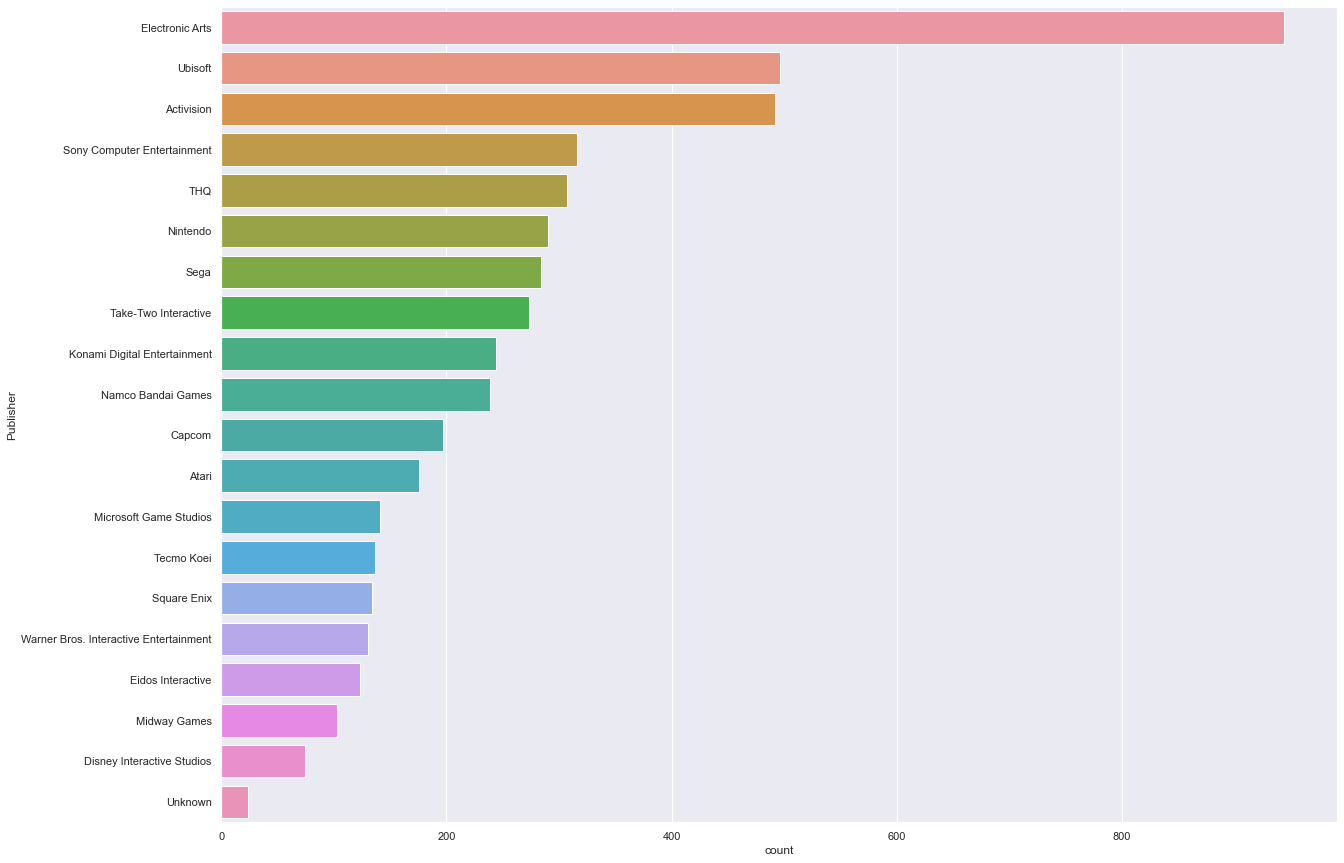

In [2]:
a = plt.figure(figsize=(20, 15))
ax = sb.countplot(y="Publisher", data=mainData, order=mainData.Publisher.value_counts().iloc[:20].index,orient = 'h')


This graph shows the distribution of games by the top 20 publishers. The publisher with the most games at that time was ‘Electronic Arts’. 

### Total Count for each Genre

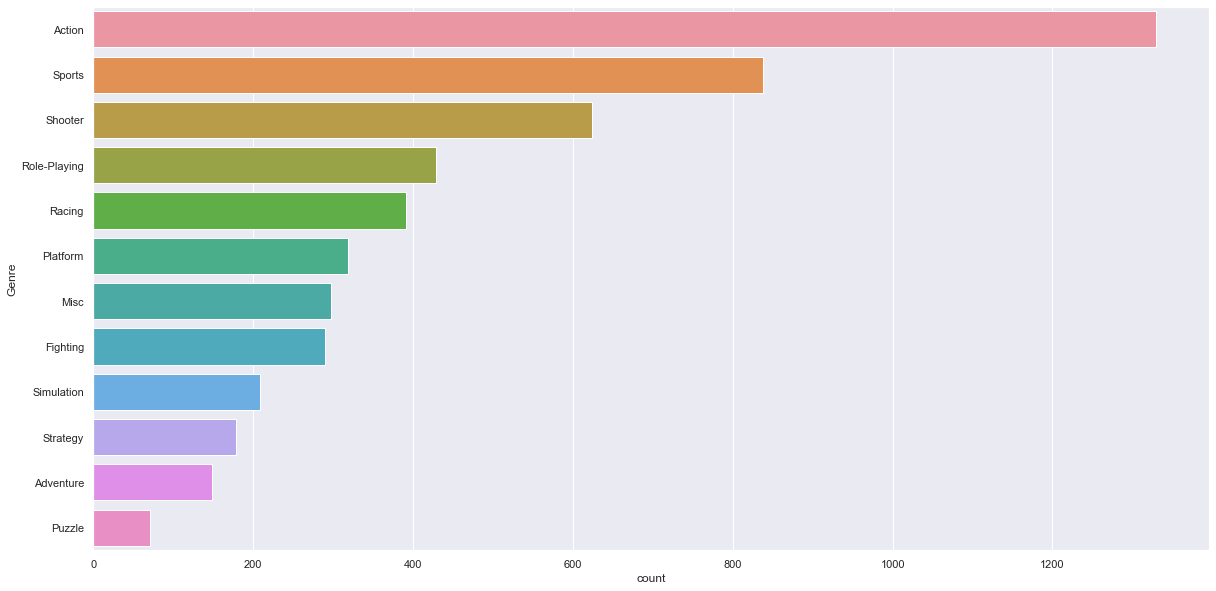

In [3]:
a = plt.figure(figsize=(20, 10))
ax = sb.countplot(y="Genre", data=mainData, order=mainData.Genre.value_counts().index)

This graph shows how many games lie in each of the genres, with ‘Action’ being the most popular genre.

### Total Count for each Platform

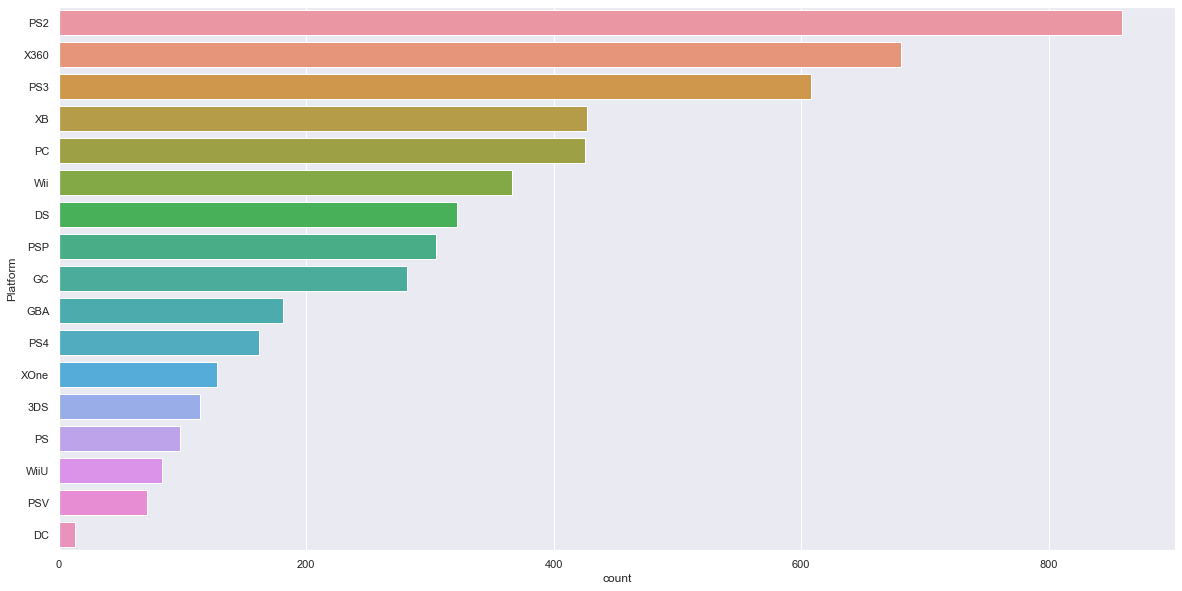

In [4]:
a = plt.figure(figsize=(20, 10))

ax = sb.countplot(y="Platform", data=mainData, order=mainData.Platform.value_counts().index)

This graph shows how many games have been released by all the platforms, with ‘PS2’ having the most number of games at that period time. 

### Total Count for each Year of Release

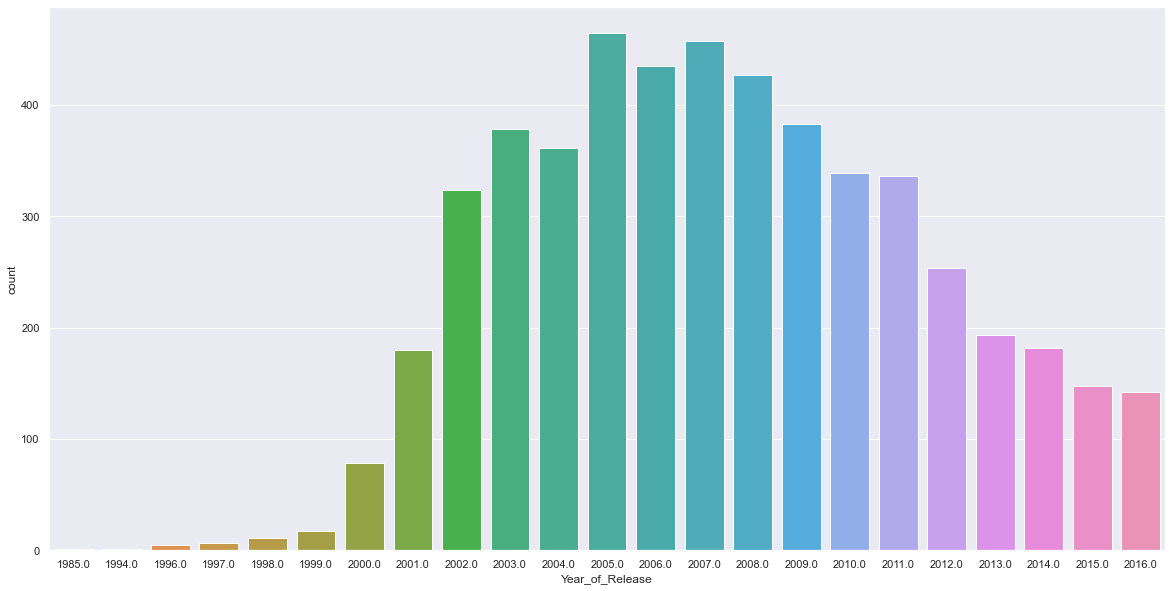

In [5]:
a = plt.figure(figsize=(20, 10))
ax = sb.countplot(x="Year_of_Release", data=mainData)

This graph shows the distribution of games have been released from 1985 to 2016, with 2005 having the most number of games at that time. It also shows the growth of video games, peaking at 2005, while gradually dropping after 2005 

### Next, we decided to see if there were any clear relation between variables through the plotting of boxplots. 

### Relation of Critic score vs GlobalSales

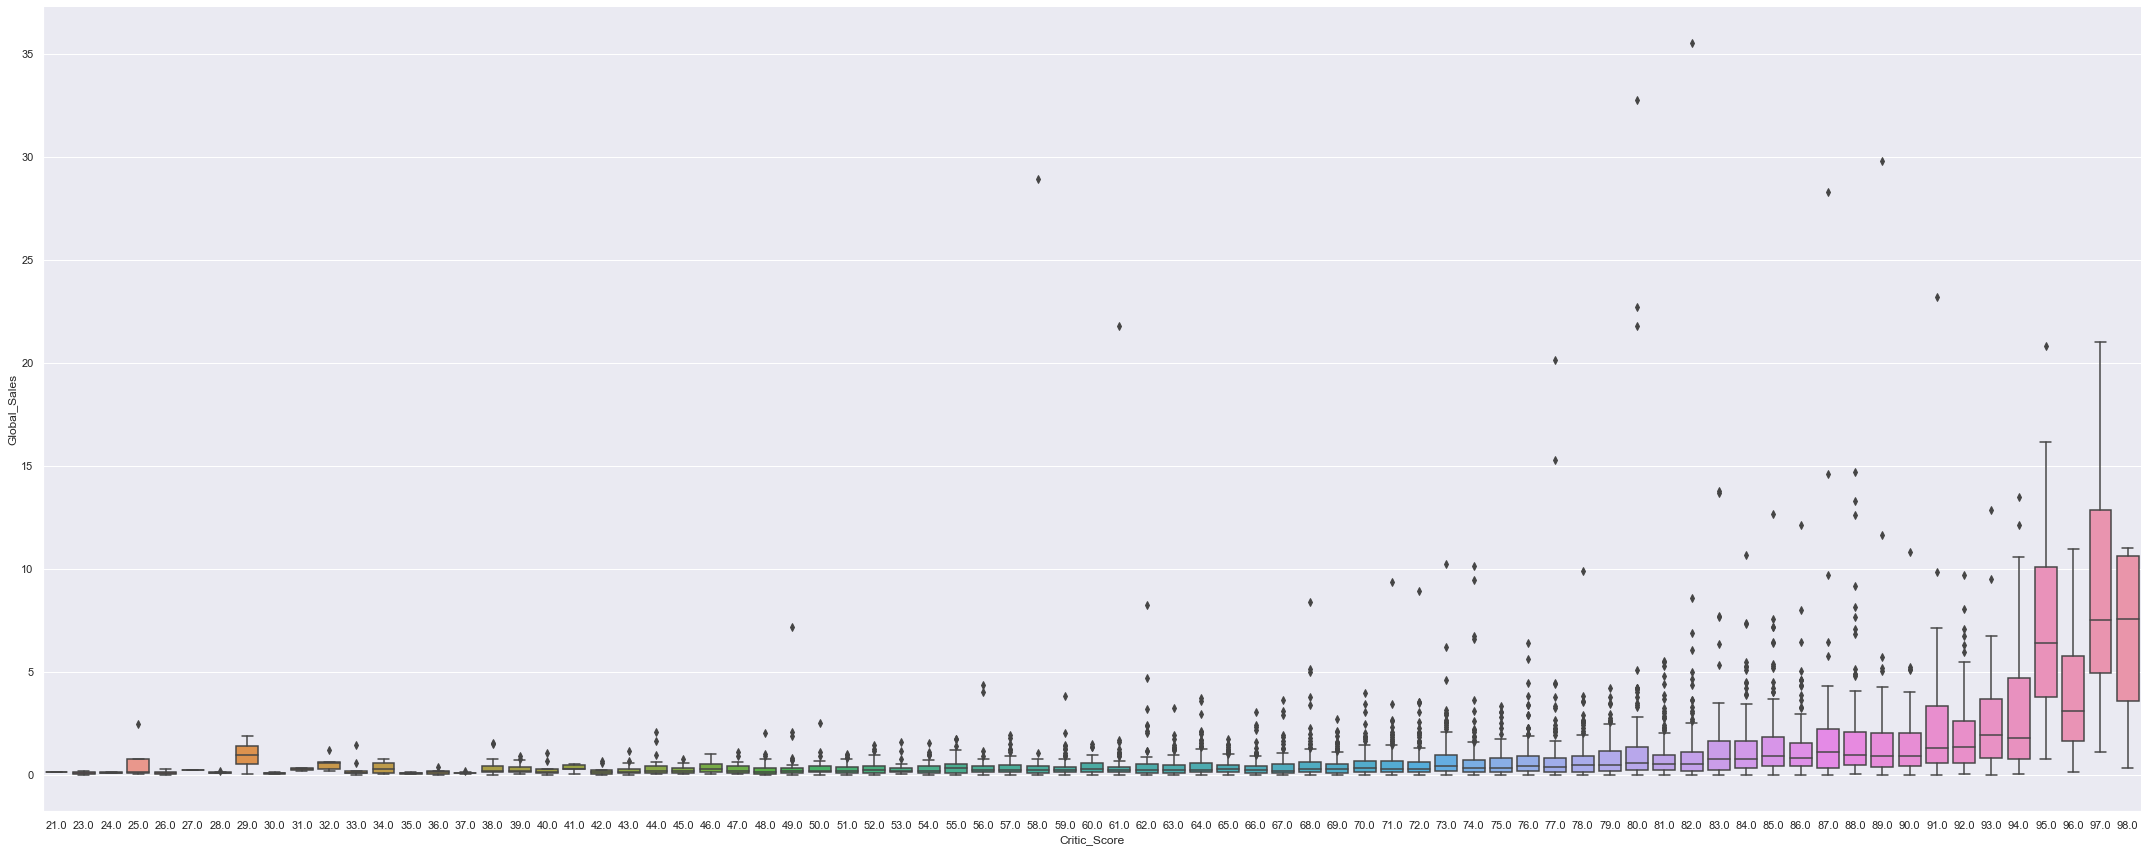

In [6]:
sb.catplot(x="Critic_Score", y="Global_Sales", kind="box",height=12, aspect= 2.5, data=mainData)

This first graph shows Global_Sales against Critic Score. 

There seems to be a positive correlation between Critic Score and Global Sales, as seen from the rising trend shown above. 

### Relation of User score vs GlobalSales

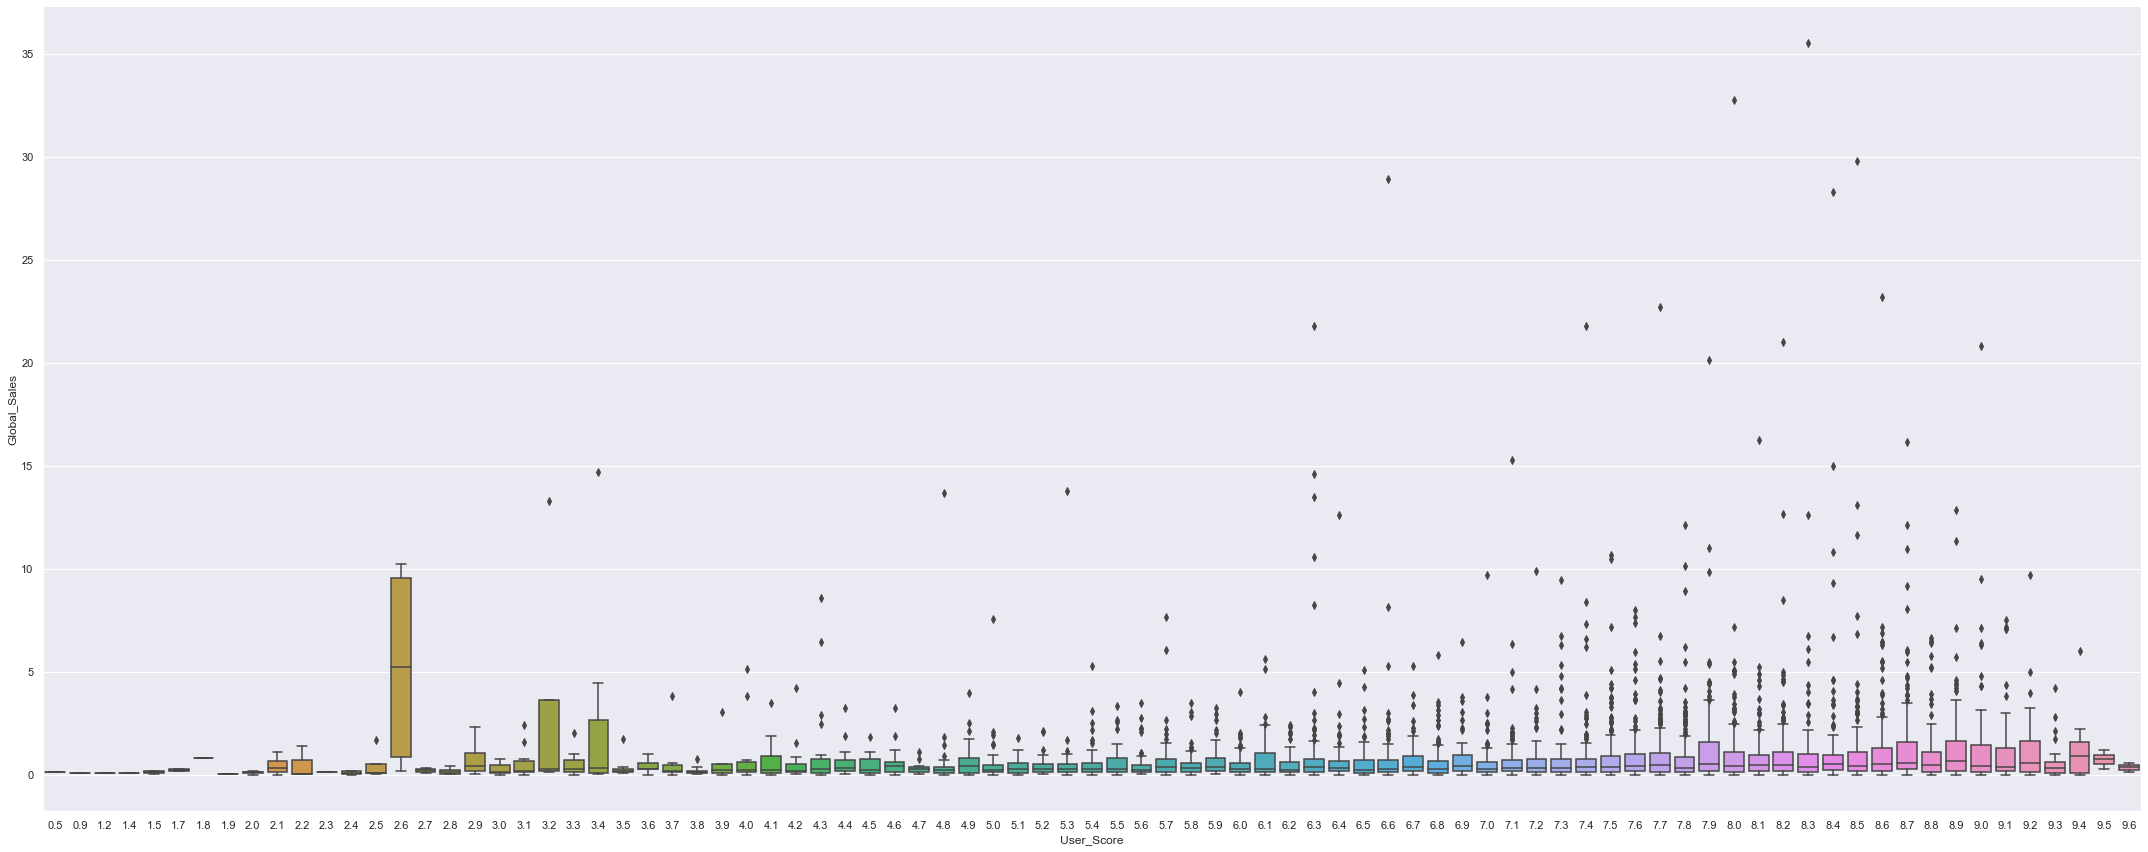

In [7]:
sb.catplot(x="User_Score", y="Global_Sales", kind="box",height=12, aspect= 2.5, data=mainData)

This graph plots Global Sales against User Score. There seems to be a slight positive correlation between User Score and Global Sales, with the User Score 2.6 being an outlier with the highest median. 


### Relation of Platform vs GlobalSales

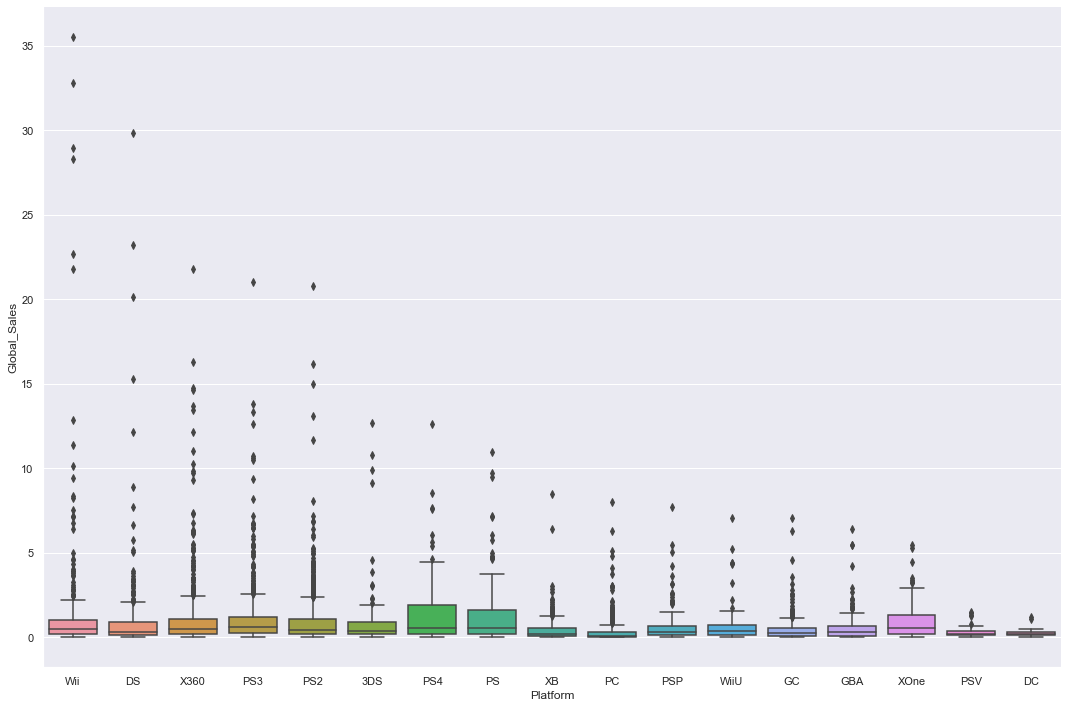

In [8]:
sb.catplot(x="Platform", y="Global_Sales", kind="box",height=10, aspect=1.5,data=mainData)

This graph shows Global_Sales against Platforms, with no clear relationship between them. 

### Relation of Publisher vs GlobalSales

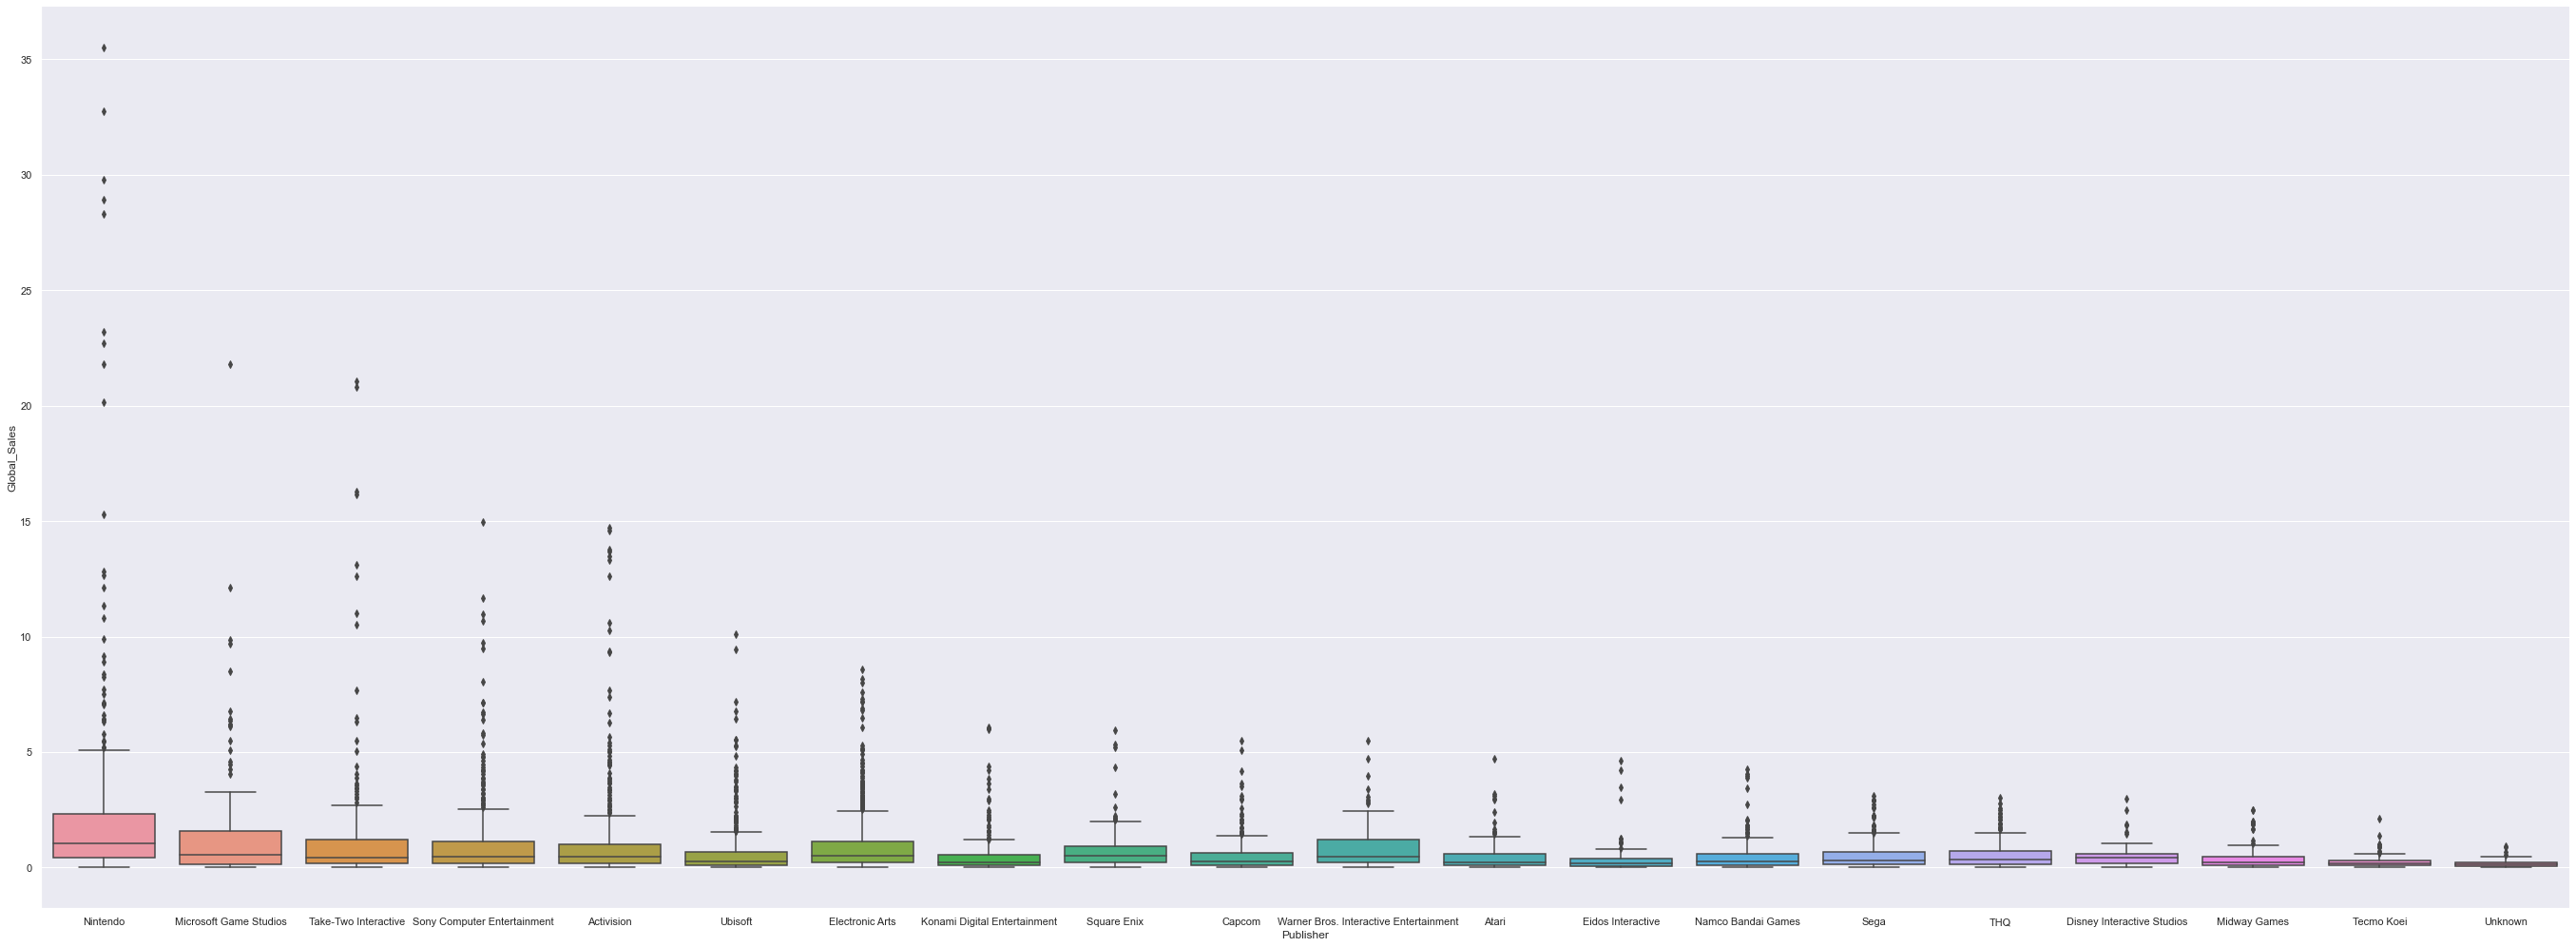

In [9]:
sb.catplot(x="Publisher", y="Global_Sales", kind="box",height=14, aspect=2.7,data=mainData)

This graph shows Global_Sales against Publisher, with no clear relationship between them. 

### Relation of Genre vs GlobalSales

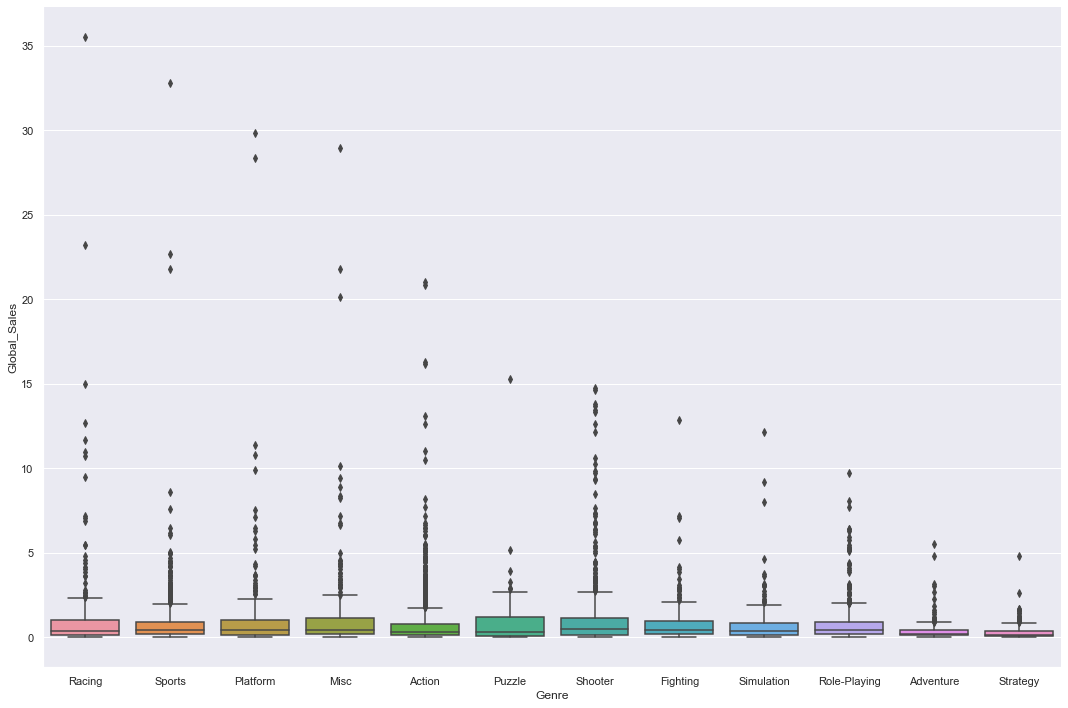

In [10]:
sb.catplot(x="Genre", y="Global_Sales", kind="box",height=10, aspect=1.5,data=mainData)

This graph shows Global_Sales against Genre, with no clear relationship between them. 

### Correlation Heatmap between Global Sales, Critic Score, User Score, Year of Release

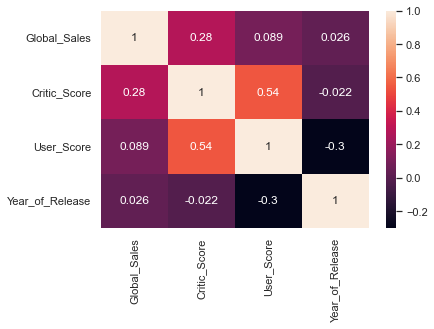

In [11]:
NumCorr = mainData[['Global_Sales','Critic_Score','User_Score','Year_of_Release']]
dataplot = sb.heatmap(NumCorr.corr(), annot=True)

Our findings can be further confirmed with this heatmap. This heatmap shows that there is decent correlation between Critic Score and User Score, however 3 of the variables(Critic_Score, User_Score, Year_of_Release) do not have much correlation with Global Sales.